In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
data = pd.read_csv('Supermart_Grocery_Sales (1).csv')
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

    Order Date Region  Sales  Discount  Profit       State  
0   8-Nov-2017  North   1254      0.12  401.28  Tamil Nadu  
1   8-Nov-2017  South    749      0.18  149.80  Tamil Nadu  
2  12-Jun-2017   West   2360      0.21  165.20  Tamil Nadu  
3  11-Oct-2016  South    896      0.25   89.60  Tamil Nadu  
4  11-Oct-2016  South   2355      0.26  918.45  Tamil Nadu  


In [28]:
print(data.isnull().sum())
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [30]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


In [32]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Order Month'])
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  Month  
0   1254      0.12  401.28      0          8           11        2017     10  
1    749      0.18  149.80      0          8           11        2017     10  
2   2360      0.21  165.20      0         12            6        2017      5  
3    896      0.25   89.60      0         11           10        2016      9  
4   2355      0.26  918.45      0         11           10        2016      9  


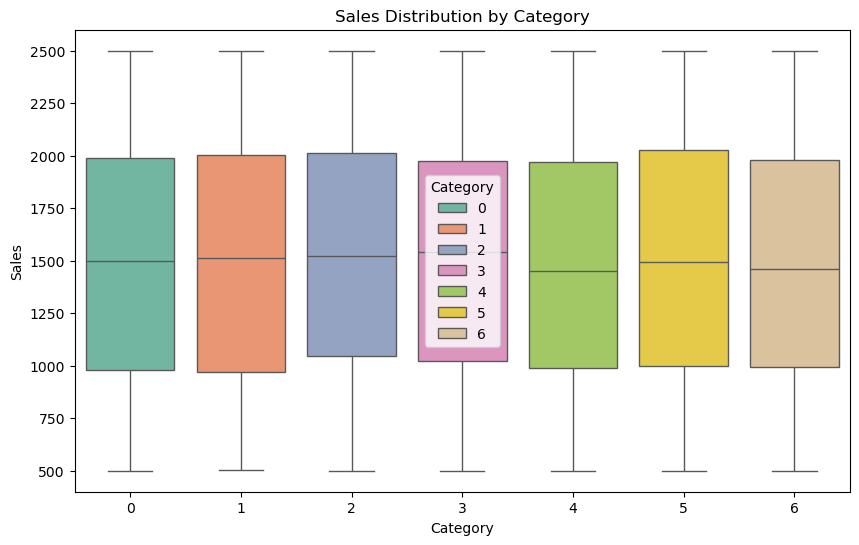

In [87]:
plt.figure(figsize=(10,6))
x='Category'
y='Sales'
sns.boxplot(x='Category', y='Sales',hue ='Category', data=data,palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

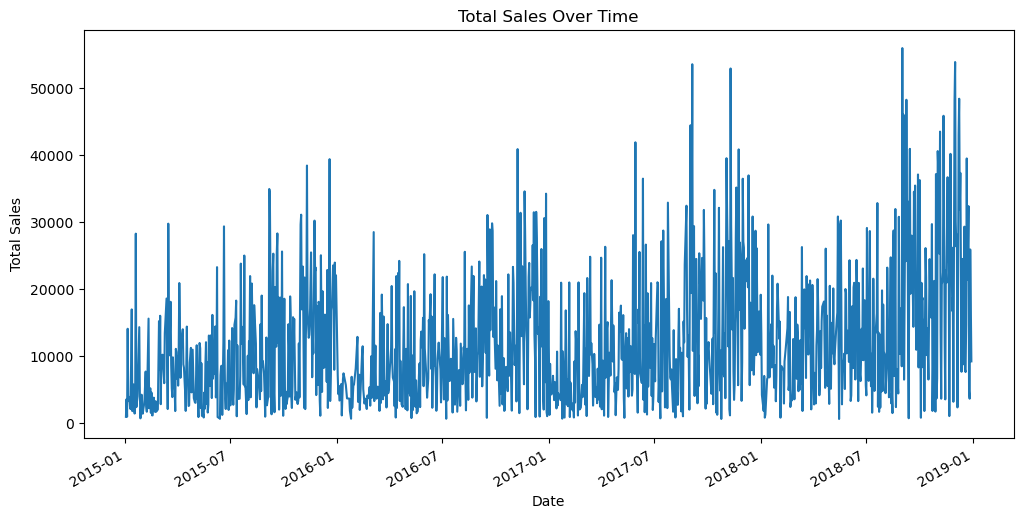

In [34]:
plt.figure(figsize=(12,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


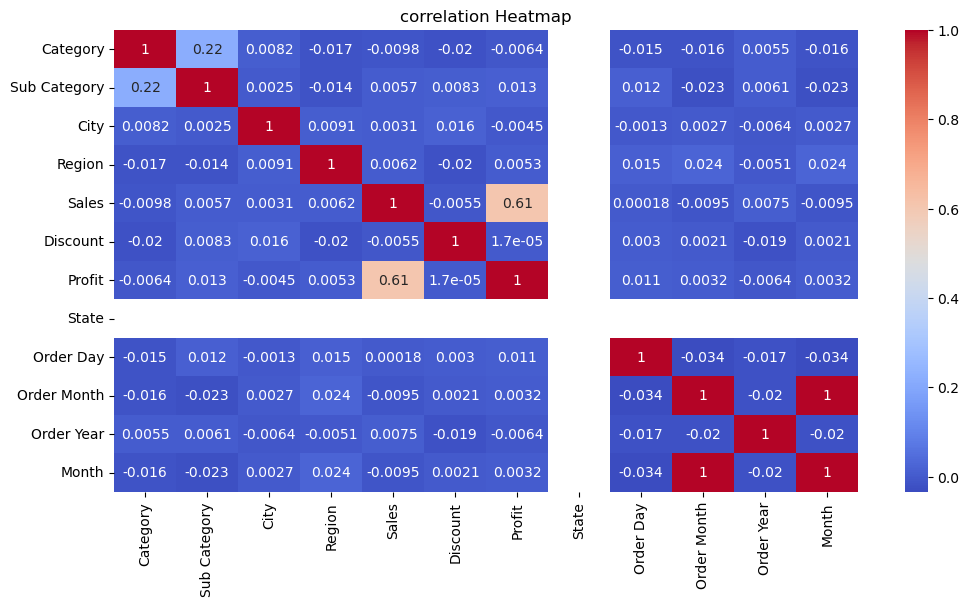

In [107]:
plt.figure(figsize=(12,6))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [36]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Month'])
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


In [42]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212954.0831344011
R-squared: 0.35432577117573116


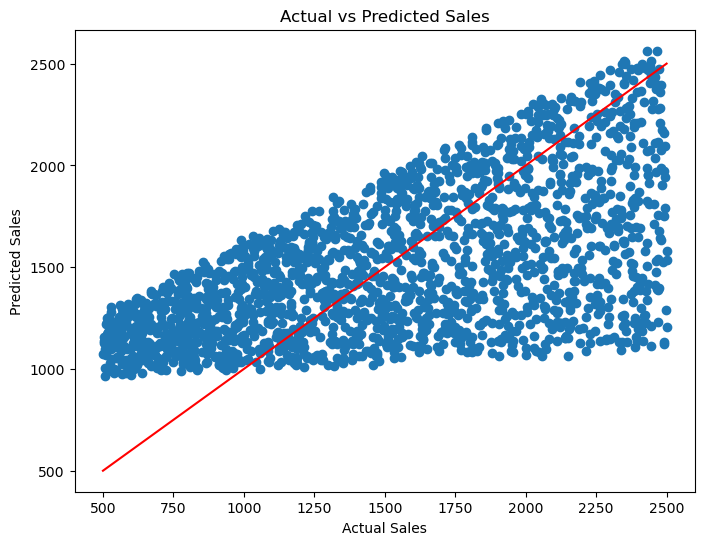

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()